In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_dir = "/content/drive/MyDrive/test"

image_types = []

for i in os.listdir(train_dir):
    image_types.append(i)

print("Types of images in dataset: ")
print(image_types)

Types of images in dataset: 
['ship', 'cat', 'truck', 'dog', 'airplane', 'frog', 'deer', 'horse', 'automobile', 'bird']


In [4]:
train_data = []

for i in image_types:
    train_path = os.path.join(train_dir, i)
    class_type = i
    for image in tqdm(os.listdir(train_path)):
        train_data_arr = cv2.imread(os.path.join(train_path, image))
        grayscale_image_arr = cv2.cvtColor(train_data_arr, cv2.COLOR_BGR2GRAY)
        train_data.append([grayscale_image_arr, class_type])

100%|██████████| 1000/1000 [00:14<00:00, 70.53it/s]


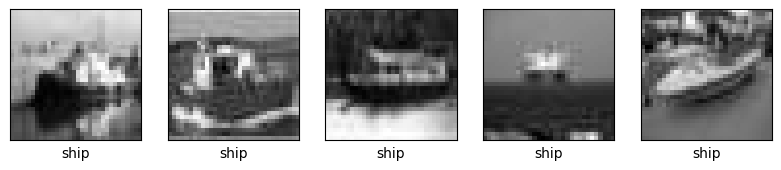

In [5]:
plt.figure(figsize=(20,5))
for i in range(5):
	plt.subplot(2,10,i+1)
	plt.imshow(train_data[i][0], cmap="gray")
	plt.xticks([])
	plt.yticks([])
	plt.xlabel(f"{train_data[i][1]}")
plt.show()

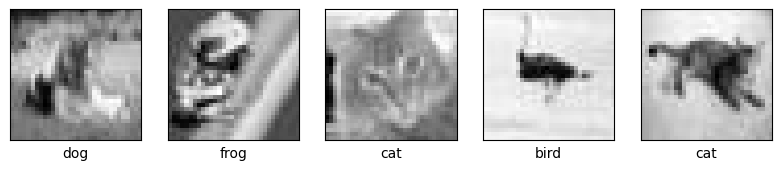

In [6]:
random.shuffle(train_data)

plt.figure(figsize=(20,5))
for i in range(5):
	plt.subplot(2,10,i+1)
	plt.imshow(train_data[i][0], cmap="gray")
	plt.xticks([])
	plt.yticks([])
	plt.xlabel(f"{train_data[i][1]}")
plt.show()

Fold 0 K = 1 Manhattan (L1) Accuracy: 0.17
Fold 0 K = 1 Euclidean (L2) Accuracy: 0.125
Fold 1 K = 1 Manhattan (L1) Accuracy: 0.135
Fold 1 K = 1 Euclidean (L2) Accuracy: 0.105
Fold 2 K = 1 Manhattan (L1) Accuracy: 0.185
Fold 2 K = 1 Euclidean (L2) Accuracy: 0.155
Fold 3 K = 1 Manhattan (L1) Accuracy: 0.185
Fold 3 K = 1 Euclidean (L2) Accuracy: 0.115
Fold 4 K = 1 Manhattan (L1) Accuracy: 0.14
Fold 4 K = 1 Euclidean (L2) Accuracy: 0.14
Fold 0 K = 2 Manhattan (L1) Accuracy: 0.145
Fold 0 K = 2 Euclidean (L2) Accuracy: 0.14
Fold 1 K = 2 Manhattan (L1) Accuracy: 0.145
Fold 1 K = 2 Euclidean (L2) Accuracy: 0.12
Fold 2 K = 2 Manhattan (L1) Accuracy: 0.18
Fold 2 K = 2 Euclidean (L2) Accuracy: 0.17
Fold 3 K = 2 Manhattan (L1) Accuracy: 0.16
Fold 3 K = 2 Euclidean (L2) Accuracy: 0.16
Fold 4 K = 2 Manhattan (L1) Accuracy: 0.18
Fold 4 K = 2 Euclidean (L2) Accuracy: 0.135
Fold 0 K = 3 Manhattan (L1) Accuracy: 0.14
Fold 0 K = 3 Euclidean (L2) Accuracy: 0.115
Fold 1 K = 3 Manhattan (L1) Accuracy: 0.145

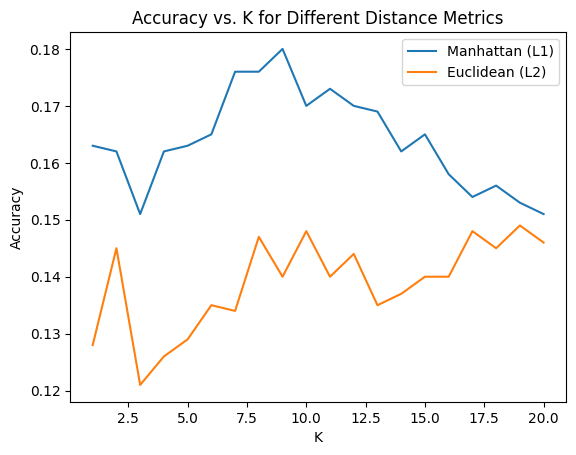

In [7]:
f0 = train_data[0:200]
f1 = train_data[200:400]
f2 = train_data[400:600]
f3 = train_data[600:800]
f4 = train_data[800:1000]

k_values = range(1, 21)
accuracies_l1 = []
accuracies_l2 = []
top_predictions_l1 = []
top_predictions_l2 = []

for k in k_values:
    fold_accuracies_l1 = []
    fold_accuracies_l2 = []
    fold_predictions_l1 = []
    fold_predictions_l2 = []

    for i in range(5):
        if i == 0:
            train = f1 + f2 + f3 + f4
            validation = f0
        elif i == 1:
            train = f0 + f2 + f3 + f4
            validation = f1
        elif i == 2:
            train = f1 + f0 + f3 + f4
            validation = f2
        elif i == 3:
            train = f1 + f2 + f0 + f4
            validation = f3
        elif i == 4:
            train = f1 + f2 + f3 + f0
            validation = f4

        correct_l1 = 0
        correct_l2 = 0
        total = 0
        predictions_l1 = []
        predictions_l2 = []

        for v in validation:
            distances_l1 = []
            distances_l2 = []

            for t in train:
                l1_dist = np.sum(np.abs(t[0] - v[0]))
                l2_dist = np.sqrt(np.sum((t[0] - v[0]) ** 2))
                distances_l1.append((l1_dist, t[1]))
                distances_l2.append((l2_dist, t[1]))

            distances_l1.sort()
            distances_l2.sort()

            neighbors_l1 = [dist[1] for dist in distances_l1[:k]]
            neighbors_l2 = [dist[1] for dist in distances_l2[:k]]

            prediction_l1 = max(set(neighbors_l1), key=neighbors_l1.count)
            prediction_l2 = max(set(neighbors_l2), key=neighbors_l2.count)

            if prediction_l1 == v[1]:
                correct_l1 += 1
            if prediction_l2 == v[1]:
                correct_l2 += 1

            total += 1

            top_k_predictions_l1 = [dist[1] for dist in distances_l1[:5]]
            top_k_predictions_l2 = [dist[1] for dist in distances_l2[:5]]
            predictions_l1.append(top_k_predictions_l1)
            predictions_l2.append(top_k_predictions_l2)

        accuracy_l1 = correct_l1 / total
        accuracy_l2 = correct_l2 / total

        fold_accuracies_l1.append(accuracy_l1)
        fold_accuracies_l2.append(accuracy_l2)
        fold_predictions_l1.append(predictions_l1)
        fold_predictions_l2.append(predictions_l2)

        print("Fold", i, "K =", k, "Manhattan (L1) Accuracy:", accuracy_l1)
        print("Fold", i, "K =", k, "Euclidean (L2) Accuracy:", accuracy_l2)

    accuracies_l1.append(fold_accuracies_l1)
    accuracies_l2.append(fold_accuracies_l2)
    top_predictions_l1.append(fold_predictions_l1)
    top_predictions_l2.append(fold_predictions_l2)


accuracies_l1 = np.array(accuracies_l1)
accuracies_l2 = np.array(accuracies_l2)


avg_accuracies_l1 = np.mean(accuracies_l1, axis=1)
avg_accuracies_l2 = np.mean(accuracies_l2, axis=1)


plt.plot(k_values, avg_accuracies_l1, label="Manhattan (L1)")
plt.plot(k_values, avg_accuracies_l2, label="Euclidean (L2)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. K for Different Distance Metrics")
plt.legend()
plt.show()


fold_index = 0
validation_index = 0
top_5_predictions_l1 = top_predictions_l1[fold_index][validation_index]
top_5_predictions_l2 = top_predictions_l2[fold_index][validation_index]

In [8]:
print("Top 5 Predictions (Manhattan - L1):")
for i, prediction in enumerate(top_5_predictions_l1[:5]):
    print(f"Prediction {i+1}: Class {prediction}")

print("")

print("Top 5 Predictions (Euclidean - L2):")
for i, prediction in enumerate(top_5_predictions_l2[:5]):
    print(f"Prediction {i+1}: Class {prediction}")


Top 5 Predictions (Manhattan - L1):
Prediction 1: Class ['ship', 'airplane', 'airplane', 'airplane', 'airplane']
Prediction 2: Class ['airplane', 'airplane', 'bird', 'airplane', 'airplane']
Prediction 3: Class ['ship', 'airplane', 'airplane', 'airplane', 'bird']
Prediction 4: Class ['bird', 'airplane', 'airplane', 'airplane', 'airplane']
Prediction 5: Class ['airplane', 'ship', 'airplane', 'airplane', 'cat']

Top 5 Predictions (Euclidean - L2):
Prediction 1: Class ['automobile', 'ship', 'airplane', 'ship', 'deer']
Prediction 2: Class ['cat', 'dog', 'airplane', 'automobile', 'airplane']
Prediction 3: Class ['bird', 'ship', 'cat', 'deer', 'frog']
Prediction 4: Class ['bird', 'airplane', 'ship', 'cat', 'deer']
Prediction 5: Class ['airplane', 'ship', 'horse', 'bird', 'deer']
